# Creating and drawing graphs with networkx

<b>Goals of this notebook:</b>
Learn how to create and draw undirected and directed graphs with and wihtout node and edge attributes.

<b>Python packages required:</b>
`networkx`

<b>Additional resources:</b>
For more on networkx including examples and tutorials, see https://networkx.github.io/documentation/stable/.
For more on graph drawing, see https://networkx.github.io/documentation/stable/reference/drawing.html.

## Part 1. Undirected graphs

Graphs are ways of representing relationships between objects. 
A graph consists of two components: a set of nodes (sometimes called vertices) and a set of edges that connect the nodes.

### Creating graphs

We can build graphs in Python using three steps.

<b>Step 1: Import Python's toolbox for graphs.</b> 
This toolbox is called `networkx`. 

<b>Step 2: Create an empty graph.</b>
An empty graph is just the graph that contains no nodes or edges.

<b>Step 3: Add nodes and edges.</b>

Let's use the the following example to demonstrate <b>Steps 1-3</b>.

$$
\begin{array}{rcl}
\text{Nodes} &=& \{1, 2, \dotsc, 7\}\\
\text{Edges} &=&\{\{i,j\} : ~~ |i - j| \equiv 1\pmod{5} ~~\text{or} ~~ |i - j| \equiv 2\pmod{5}\}.
\end{array}
$$

<i>Note:</i>
We can label each node with anything we choose, e.g., a number, a letter, or a name.

#### Steps 1 and 2. Loading networkx and creating an empty graph

The first thing to do is load `networkx` using the command

`import networkx as nx`

<i>Note:</i> You need to load the `networkx` package only once in the notebook.

In [1]:
# Load networkx
import networkx as nx

After loading `networkx` as above, we can create an empty graph named `G` with the command 

`G = nx.Graph()`

Feel free to replace `G` with the name that you want for your graph.

Run the following line of code to import `networkx` and create `G`.

In [2]:
# Create an empty graph
G = nx.Graph()

#### Step 3. Adding nodes and edges 

There are many ways to add nodes to `G`.
We add the node labeled `v` to `G` using the command 

`G.add_node(v)` 

We can view the nodes of `G` using the command `G.nodes`.

Run the following line of code to add node labeled `1` and print the node list. 

In [3]:
# Add one node to G
G.add_node(1)

# Print the node list
print(f'The nodes of G are {G.nodes}.')

The nodes of G are [1].


We can add multiple nodes using the command `G.add_nodes_from()`.
If we want to add nodes `2,3,4,5` to `G`, then we using the command 

`G.add_nodes_from([2,3,4,5])`

<i>Note:</i> The nodes that we add are inserted in `G.add_nodes_from()` using a Python list. Therefore, we can also add the nodes `2,3,4,5` using `G.add_nodes_from(range(2,6))`.

Run the following line of code to add node labeled `2` through `5` and print the node list.

In [4]:
# Add multiple nodes to G
G.add_nodes_from([2, 3, 4, 5])

# Print the nodes
print(f'The nodes of G are {G.nodes}.')

The nodes of G are [1, 2, 3, 4, 5].


A third way to add a node is to add an edge containing the node.
Notice that the last two nodes that we need to add, `6` and `7`, form an edge in `G`. 
We can add one edge at a time using the command `G.add_edge()` with the two nodes of the edge inserted in `()`.
Therefore, the command 

`G.add_edge(6,7)` 

will add the nodes `6` and `7` <i>and</i> add the edge `(6,7)`.

We can access the current edge list using the command `G.edges`.
 
Run the following line of code to add nodes `6` and `7` and print the nodes and edges.

In [5]:
# Add nodes to G by adding an edge
G.add_edge(6, 7)

# Print the nodes
print(f'The nodes of G are {G.nodes}.')

# Print the edges
print(f'The edges of G are {G.edges}.')

The nodes of G are [1, 2, 3, 4, 5, 6, 7].
The edges of G are [(6, 7)].


The command `G.add_edge()` adds one edge to `G`. 
We can add multiple edges using the command `G.add_edges_from()` with the edges inserted in `()` in a list.
For example, the command

`G.add_edges_from([(1,2), (2,3), (3,4), (4,5)])`

will add the edges `(1,2), (2,3), (3,4)` and `(4,5)` to `G`.

Run the following line of code to add these edges to `G` and print the edges.

In [6]:
# Add multiple edges
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5)])

# Print the edges
print(f'The edges of G are {G.edges}.')

The edges of G are [(1, 2), (2, 3), (3, 4), (4, 5), (6, 7)].


It is important to know that we can also remove nodes and edges from a graph. 
The command to remove a node is `G.remove_node()`, and the command to remove an edge is `G.remove_edge()`.
For example, the command

`G.remove_edge(1, 2)`

removes the edge `(1,2)` from `G`.
We can also use the commands `G.remove_nodes_from()` and `G.remove_edges_from()`.

Run the following line of code to remove the edge `(1, 2)` from `G` and print the edges.

In [7]:
# Removing edges
G.remove_edge(1, 2)

#Print the edges
print(f'The edges of G are {G.edges}.')

The edges of G are [(2, 3), (3, 4), (4, 5), (6, 7)].


We can add the remaining edges of `G` by looping through all nodes and checking if they form an edge of `G`.
We can loop through the nodes of `G` using 

`for i in G.nodes`

Run the following line of code to add the remaining edges to `G` and print the edges.

In [8]:
# Create the remaining edges of G
for i in G.nodes:
    for j in G.nodes:
        if abs(i - j) % 5 == 1 or abs(i - j) % 5 == 2 :
            G.add_edge(i, j)
            
# Print the edges
print(f'The edges of G are {G.edges}.')

The edges of G are [(1, 2), (1, 3), (1, 7), (2, 3), (2, 4), (3, 4), (3, 5), (4, 5), (4, 6), (5, 6), (5, 7), (6, 7)].


Congratulations!
You have succesfully created a graph using `networkx`. 

We can now examine the nodes and edges of `G`.

<i>Note:</i> The Python package `itertools` allows us to quickly loop over tuples of a set.
As an example, the double loop above could be replaced by

    from itertools import combinations

    for pair in combinations(G.nodes, 2):
        if abs(pair[0] - pair[1]) % 5 == 1 or abs(pair[0] - pair[1]) % 5 == 2:
            G.add_edge(pair[0], pair[1])

The previous code loops through all `combinations` of `G.nodes` of size `2`. 

### Drawing graphs

It is often helpful for us to visualize a graph. 
The `networkx` package can be used to plot graphs. 

<i>Note:</i> Graph drawing is difficult and it is not easy to draw a graph in `networkx` precisely how we want. 

We can draw `G` using the command 

`nx.draw(G, with_labels = True, node_color = 'lightblue')`

There is one mandatory input and many optinonal inputs to this function.

`G` : This is the name of the graph that we want to draw. It is mandatory.

`with_labels = True` : This shows the labels of our nodes. This is an optional input. If we have many nodes, then it might be helpful to remove this input.

`node_color = 'lightblue'`: This adjusts the color of the nodes.

Run the following cell to draw `G`.

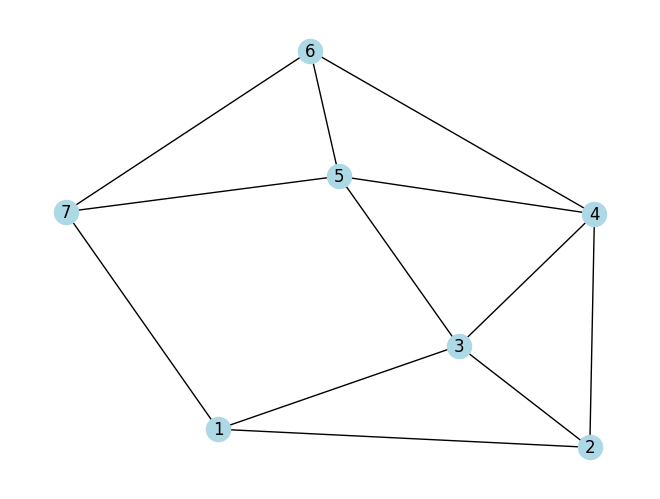

In [10]:
# This magic command is for drawing inline in the Jupyter Notebook. It has to be executed once for the full notebook.
%matplotlib inline

# Draw G
nx.draw(G, with_labels = True, node_color = 'lightblue')

# Note: There might be a deprecation warning appearing; it comes from code in the networkx package, so we cannot do much about it.

One very useful optional input is the position of the nodes. 
If we do not specify positions, then `nx.draw()` will draw the nodes in different places everytime we run it!
You can test this for yourself by re-running the previous command.
 
It is useful to choose positions because we will later use these positions to draw other things on our graph such as edge weights.
These positions can be manually created, but `networkx` has a collection of positions to choose from. 
The line of code 

`node_pos =  nx.circular_layout(G)` 

chooses the `circular_layout` positioning.
We add this positioning to our nodes by adding 

`pos = node_pos` 

as an input to the `nx.draw()` command. 

<i>Note:</i> Some layouts in `networkx` create new positions every time that it is run. Therefore, you should only run these command once and reference the position later using `node_pos`!
If you do this, then every time you draw `G` the nodes will be in the same position.

Run the following lines of code to set the node positions.

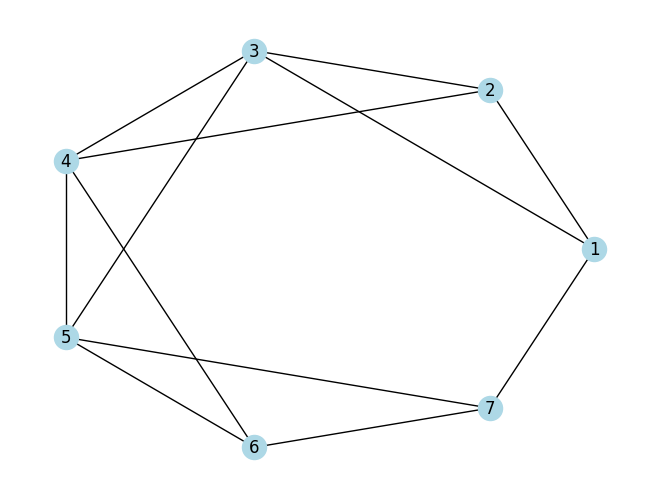

In [11]:
# Fix a position of the nodes
node_pos =  nx.circular_layout(G)

# Draw G with fixed positions
nx.draw(G,with_labels = True, pos = node_pos, node_color = 'lightblue')

### Mini-conclusion

At this point, we have seen how to create undirected graphs and draw them.

## Part 2. Directed graphs

Many graphs have directions on the edges (edges with directions are called arcs). Such graphs are called directed graphs or digraphs for short.

### Creating digraphs

We can create these 'digraphs' using `networkx` in the same way as undirected graphs. 

<b>Step 1</b> Import `networkx`.

<b>Step 2</b> Create an empty digraph.

<b>Step 3</b> Add nodes and arcs. 

Let's illustrate these steps using the following digraph:

$$
\begin{array}{rcl}
\text{Nodes} &=& \{\text{A}~,\text{L},~\text{P},~\text{H},~\text{B},~\text{E},~\text{T}\}\\
\text{Arcs} &=&\{(u,v) : \text{ if } u \text{ comes directly before } v \text{ in the word ALPHABET}\}.
\end{array}
$$

#### Steps 1 and 2. Import `networkx` and create an empty digraph.

These steps are almost identical to the steps for an undirected graph. 
The only difference is that we create an empty digraph using the command 

`G = nx.DiGraph()`.

Run the following code create an empty digraph.

<i>Note:</i> As we mentioned in the section on undirected graphs, the `networkx` package is already loaded, so it's not necessary to repeat Step 1 here.

In [12]:
# Import networkx and run the magic command for later inline drawings
# It's sufficient to execute these commands once in the whole notebook
import networkx as nx
%matplotlib inline

# Create an empty digraph
G = nx.DiGraph()

#### Step 3. Add nodes and arcs

These commands are exactly the same as they are for undirected graphs!
However, the order of the nodes is important when we add an arc. 
The first node becomes the tail of the arc and the second node becomes the head of the arc. 
For example, the command

`G.add_edge("A", "L")`

will create an arc starting at `A` and pointing to `L`.

<i>Note:</i>
If a node is labeled with a letter or a word, then we must add it using quotation marks. For example, the command `G.add_node("A")` adds node A.

<i>Note:</i>
If we try to add two nodes with the same label, then Python will only keep one copy of the node.

Run the following code to add the nodes and arcs of `G`.

In [13]:
# Create the nodes and arcs 
word = "ALPHABET"

G.add_nodes_from(list(word)) # list("ALPHABET") gives ['A', 'L', 'P', 'H', 'A', 'B', 'E', 'T']

for i in range(0, len(word)-1):
    G.add_edge(word[i], word[i+1])
    
# Print the nodes and arcs of G

print(f'The nodes of G are {G.nodes}.')
print(f'The arcs of G are {G.edges}.')

The nodes of G are ['A', 'L', 'P', 'H', 'B', 'E', 'T'].
The arcs of G are [('A', 'L'), ('A', 'B'), ('L', 'P'), ('P', 'H'), ('H', 'A'), ('B', 'E'), ('E', 'T')].


### Additional properties of digraphs

Digraphs have more properties than undirected graphs.
For example, a node `v` in a directed graph has an indegree and an outdegree. 
These are accessed using the commands 

`H.in_degree(v)` and `H.out_degree(v)`.

We can view the nodes that `v` points to using 

`H.successors(v)`

and the nodes that point to `v` using 

`H.predecessors(v)`

<i>Note:</i> The commands `H.successors(v)` and `H.predecessors(v)` return iterators. These are perfect for iterating through successors or predecessors; to look at the actual successors or predecessors, we can convert them to lists using `list(H.successors(v))`.

Run the following code to check the in- and outdegree of `A` and print its successors/predecessors. 

In [14]:
# Print the indegree and predecessors of A.
print(f'The indegree of node A is {G.in_degree("A")}.')
print(f'The predecessors of node A are {list(G.predecessors("A"))}.')

# Print the outdegree and successors of A.
print(f'The outdegree of node A is {G.out_degree("A")}.'.format())
print(f'The successors of node A are {list(G.successors("A"))}.')

The indegree of node A is 1.
The predecessors of node A are ['H'].
The outdegree of node A is 2.
The successors of node A are ['L', 'B'].


Another useful thing is to turn a digraph into an undirected graph. 
We can do this using the command 

`G_undirected = nx.Graph(G)`. 

Run the following commands to turn `G` into an undirected graph.

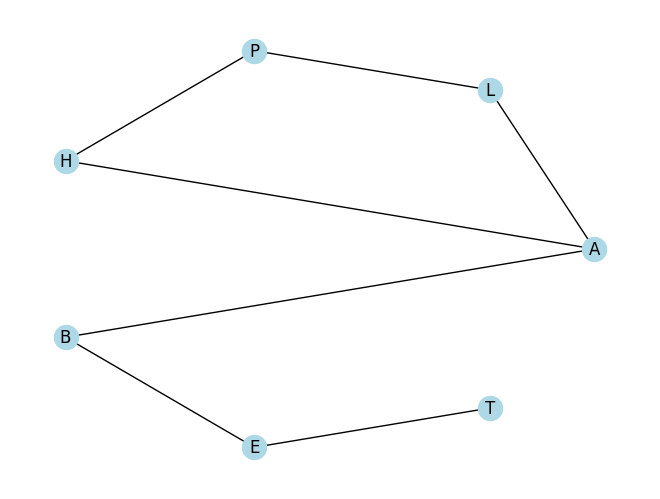

In [15]:
# Turn G into an undirected graph
G_undirected = nx.Graph(G)

# Draw G_undirected
node_pos = nx.circular_layout(G_undirected)

nx.draw(G_undirected, with_labels = True, pos = node_pos, 
        node_color = 'lightblue')

### Drawing digraphs

We can draw `G` using the same command as before:

`nx.draw(G, with_labels = True, pos = node_pos, node_color = 'lightblue', arrowsize=20)` 

Here we see a new optional input `arrowsize=20` to the `nx.draw()` command.
The arcs of `G` are denoted with arrows, and this input lets us choose their size. 

Run the following code to draw `G`.

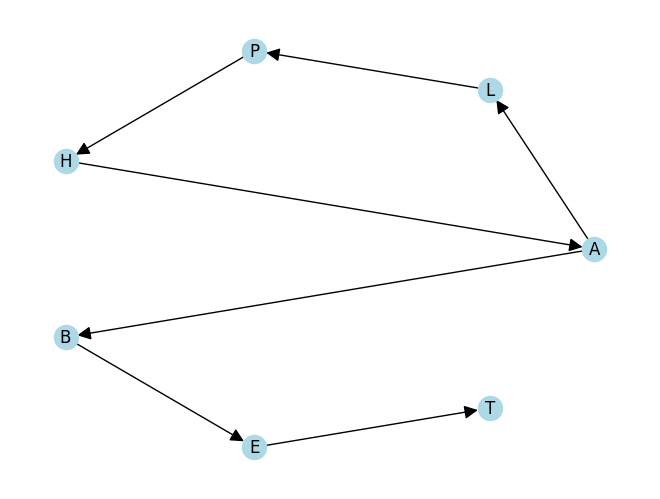

In [16]:
# Fix a position of the nodes
node_pos = nx.circular_layout(G)

# Draw G
nx.draw(G, with_labels = True, pos = node_pos, 
        node_color = 'lightblue', arrowsize=20)

# Note: There might be a deprecation warning appearing; it comes from code in the networkx package, so we cannot do much about it.

### Mini-conclusion

Thus, digraphs in `networkx` are created in almost the same way as undirected graphs and drawn in exactly the same way.

## Part 3. Node and edge attributes

We have seen how to create graphs and digraphs.
These structures capture the relationships between different objects. 
However, it is often helpful to add extra attributes to these objects and their relationships. 
For example, suppose we use a graph to represent roads between major cities. 
It might be useful to keep track of how many people live in each city and the travel time between cities. 
We call these properties <b>node and edge attributes.</b>

Let us use cities as an example to illustrate node and edge attributes in `networkx`.
Consider Berlin, London, and Zurich. The following tables give the population (in millions of people) and flight time (in hours) between these cities.

$$
\begin{array}{ccc}
\text{Population} & &\text{Travel time}\\
\begin{array}{c|c}
\text{Berlin} & 3.748\\
\text{London} & 8.825 \\ 
\text{Zurich} & 0.415
\end{array}
&
\quad
&
\begin{array}{c|c|c|c}
& \text{Berlin} & \text{London} & \text{Zurich}\\
\hline
\text{Berlin} & -- & 1.8 & 1.5 \\
\text{London} & 1.8 &-- & 1.7 \\ 
\text{Zurich} & 1.5 &  1.7 & --
\end{array}
\end{array}
$$

We will create a graph using this data. 

Run the following line of code to import the proper package and create an empty graph.

In [17]:
# Import networkx and run the magic command for later inline drawings
# It's sufficient to execute these commands once in the whole notebook
import networkx as nx
%matplotlib inline

# Create an empty graph
G = nx.Graph()

### Adding a node attribute

If we want to add a node with an attribute to `G`, then we use the command

`G.add_node(node_label, attribute_name = attribute_value)`

There are three parts to this command:

`node_label`: This is the usual node label that we are familiar with.

`attribute_name`: This is the name of the particular attribute. For example, if we want to use the attribute `population`, then we would replace `attribute_name` by `population`.

`attribute_value`: This is the value of the attribute that we give to this node. For example, for Berlin we will replace `attribute_value` by `3.748`.

We can use the command `G.add_node_from()` to add many nodes at once.
We can still use this command with attributes using the following command:

`G.add_nodes_from([(node1, {"attribute_name": attribute_value1}), 
                   (node2, {"attribute_name": attribute_value2}),...])`

<i>Note:</i>
The command `G.add_node()` does not require quotation marks around the attribute name nor does it need the brackets `{}`. 
However, `G.add_nodes_from` does need quotation marks and `{}`. A node can have multiple attributes, and when we add multiple nodes at one time we use the quotation marks and the `{}` brackets to appropriately organize everything for Python. In fact, we provide a list of pairs, where for each pair, the first entry is a node, and the second entry is a dictionary that maps the name of an attribute (a string, hence in quotes) to its value.
Of course, with the very same syntax, we could also add several attributes at once.

Run the following code to add a node for `Berlin, London`, and `Zurich` with the `population` attribute.

In [18]:
# Add one node
G.add_node("Berlin", population = 3.748)

# Add many nodes
G.add_nodes_from([("London", {"population" : 8.825}),
                  ("Zurich", {"population" : 0.415})])

We can view a node's attribute using the command

`G.nodes[node_label]["attribute_name"]`

Notice the quotation marks around `attribute_name`.

If we want to get all of the attributes as a dictionary that maps nodes to the corresponding attribute values, then we can use 

`nx.get_node_attributes(G, "attribute_name")`

Run the following code to print the population of different cities.

In [19]:
# Print each city's population individually
for city in G.nodes:
    print(f'{city} has {G.nodes[city]["population"]} million people.')

# Print each city's population at once 
city_pop = nx.get_node_attributes(G, "population")

print(f'The populations are {city_pop}.')

Berlin has 3.748 million people.
London has 8.825 million people.
Zurich has 0.415 million people.
The populations are {'Berlin': 3.748, 'London': 8.825, 'Zurich': 0.415}.


### Adding an edge attribute

Adding edge attributes are done in the same way as node attributes except we use the commands `G.add_edge()` and `G.add_edges_from()`.
If we want to add an edge with attribute `travel_time` between `Berlin` and `London`, then we use the command

`G.add_edge("Berlin", "London", travel_time = 1.8)`

If we want to add multiple edges with attribute `travel_time`, then we use the command

`G.add_edges_from([("Berlin", "Zurich", {"travel_time": 1.5}), 
                   ("London", "Zurich", {"travel_time": 1.7})])`

We can get an edge attribute dictionary using the command 

`nx.get_edge_attributes(G, "attribute_name")`

Run the following code to add edges between each city with the `travel_time` attribute.

In [20]:
# Add one edge
G.add_edge("Berlin", "London", travel_time = 1.8)

# Add multiple edges
G.add_edges_from([("Berlin", "Zurich", {"travel_time": 1.5}), 
                  ("London", "Zurich", {"travel_time": 1.7})])

# Print the edge travel times
times = nx.get_edge_attributes(G, "travel_time")

print(f'The travel times are {times}.')

The travel times are {('Berlin', 'London'): 1.8, ('Berlin', 'Zurich'): 1.5, ('London', 'Zurich'): 1.7}.


### Editing attributes 

We can also adjust the attributes of a node or an edge.
If we want to change the popluation of `Berlin` to `3.6`, then we can use the command 

`G.nodes["Berlin"]["population"] = 3.6`

If we want to change the travel time between `London` and `Zurich` to `1.75`, then we can use the command 

`G.edges[("London","Zurich")]["travel_time"] = 1.75`

Run the following code to update these attribute values and reprint everything.

In [21]:
# Update Berlin's population
G.nodes["Berlin"]["population"] = 3.6

for city in G.nodes:
    print(f'{city} has {G.nodes[city]["population"]} million people.')
    
# Update travel time from London to Zurich
G.edges[("London","Zurich")]["travel_time"] = 1.75
        
# Print the edge travel times         
times = nx.get_edge_attributes(G, "travel_time")

print(f'The travel times are {times}.')

Berlin has 3.6 million people.
London has 8.825 million people.
Zurich has 0.415 million people.
The travel times are {('Berlin', 'London'): 1.8, ('Berlin', 'Zurich'): 1.5, ('London', 'Zurich'): 1.75}.


Many graphs have multiple node and edge attributes. 
We can simply add these extra attributes in the same way as we added the attributes `population` and `travel_time`.

### Drawing graphs with node and edge attributes

Let us draw `G` with the population written on every city's node and the travel time written on every edge. 
In order to do this, we first draw our graph with the usual command

`nx.draw(G, pos = node_pos, node_color = 'lightblue', arrowsize = 20)`

Note that we didn't set the parameter `with_labels = True`, as this would display city names instead of populations.
We can add node attributes to the drawing with

`nx.draw_networkx_labels(G, pos = node_pos, labels = nx.get_node_attributes(G, 'population'))`

Here's a breakdown of the parameters of this function:

`G` : This is the name of the graph.

`pos = node_pos` : We're using the same node position as for the original drawing, so that `networkx` positions the node attributes in the middle of each node.

`labels = nx.get_node_attributes(G, 'population')` : We choose the `population` node attribute to be displayed.

Similarly, we now draw our edge attributes on top of this graph using the command

`edge_draw = nx.draw_networkx_edge_labels(G, pos = node_pos, 
                                          edge_labels = nx.get_edge_attributes(G, 'travel_time'))`

This command has four parts:

`G` : This is the name of the graph.

`pos = node_pos` : This says where we draw the arc attribute. If we use the same position as for the nodes, then `networkx` will draw the attriute in the middle of the arc.

`edge_labels = nx.get_edge_attributes(G, 'travel_time')` : We choose to draw the `travel_time` edge attribute.

`edge_draw = ... ` : The `nx.draw_networkx_edge_labels` returns the attribute value drawn on the arcs. 
We need to store this dictionary otherwise it will be printed to the screen. This is why we use `edge_draw = ...`.

Run the following commands to visualize `H` with capacities.

/home/ssuemer/Desktop/ETH/FS25/net_int_opt/w1/.venv/lib/python3.12/site-packages/networkx/drawing/nx_pylab.py:315: UserWarning: 

The arrowsize keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


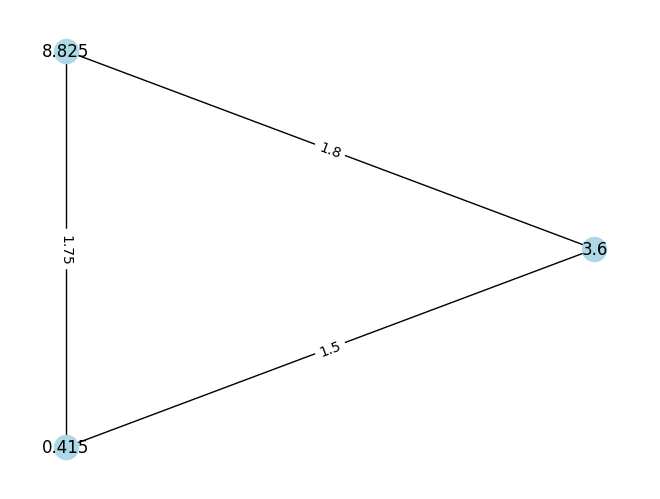

In [22]:
# Add node positions
node_pos = nx.circular_layout(G)

# Draw G
nx.draw(G, pos = node_pos, node_color = 'lightblue', arrowsize = 20)

# Draw the node labels
nx.draw_networkx_labels(G, pos = node_pos,
                        labels = nx.get_node_attributes(G, 'population'))

# Draw the edge labels
edge_draw = nx.draw_networkx_edge_labels(G, pos = node_pos, 
                                         edge_labels = nx.get_edge_attributes(G, 'travel_time'))

# Note: There might be a deprecation warning appearing; it comes from code in the networkx package, so we cannot do much about it.

### Mini-conclusion

Great! Now you know how to handle graphs with node and edge attributes.

## Conclusions

This tutorial coveres how to create and draw graphs using the `networkx` package. A future tutorial will give an overview of some graph algorithms available in `networkx`.